

## Face mask detector

In [1]:
import numpy as np

In [2]:
from PIL import Image
pic=Image.open('training/with_mask/5-with-mask.jpg')

In [3]:
pic_arr=np.asarray(pic)
print(pic_arr.shape)

(350, 622, 3)


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.callbacks import TensorBoard, ModelCheckpoint

In [3]:
img_width, img_height = 150,150
train_data_dir = r"training"
nb_train_sample =100 
nb_validation_samples =20 
epochs =20

In [4]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)
input_shape

(150, 150, 3)

In [5]:
data_generator = ImageDataGenerator(rescale=1./255, 
                                    rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range =0.2,
                                    zoom_range=0.2,horizontal_flip =True,
                                    validation_split=0.2,fill_mode='nearest')

train_generator = data_generator.flow_from_directory(train_data_dir,target_size =(img_width,img_height),batch_size=10,
                                                     class_mode='binary',
                                                    classes=['with_mask','without_mask'],shuffle=True, seed=13,
                                                     subset="training")

validation_generator = data_generator.flow_from_directory(train_data_dir, target_size =(img_width,img_height),  
                                                                seed=13,
                                                                shuffle=True,
                                                    class_mode='binary', 
                                                    batch_size=10, subset="validation")

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


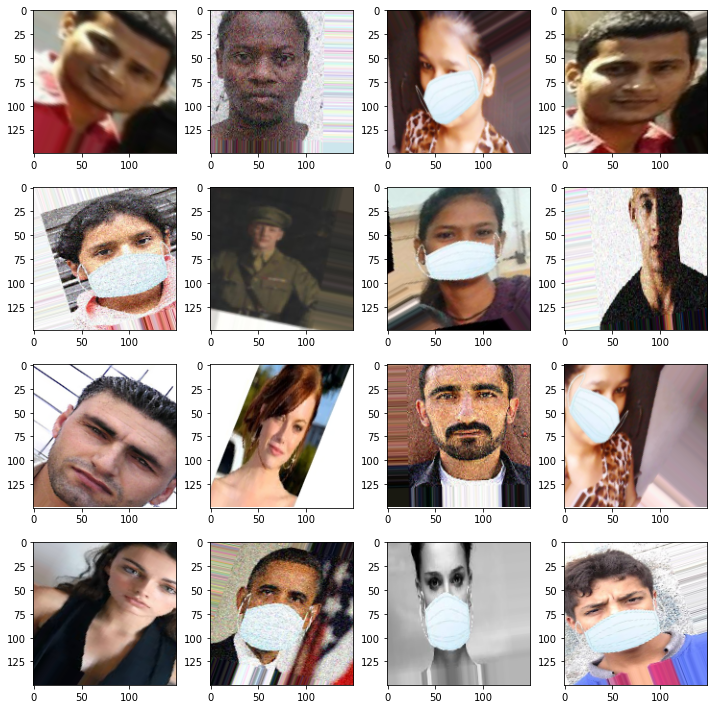

In [34]:
plt.figure(figsize=(10, 10))
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        label = Y_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [14]:
#input_shape=(100, 100, 3)
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=input_shape , activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten()) 
model.add(Dense(64, activation = 'relu')) 
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'softmax')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)            

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

In [92]:
#checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [17]:
training = model.fit_generator(train_generator,
                 steps_per_epoch=nb_train_sample,
                               epochs=20,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,
                              )

Epoch 1/20
100/100 [==============================] - 60s 602ms/step - loss: 7.5708 - accuracy: 0.5035 - val_loss: 7.0909 - val_accuracy: 0.5350
Epoch 2/20
100/100 [==============================] - 61s 608ms/step - loss: 7.6631 - accuracy: 0.4975 - val_loss: 7.3196 - val_accuracy: 0.5200
Epoch 3/20
100/100 [==============================] - 58s 583ms/step - loss: 7.6477 - accuracy: 0.4985 - val_loss: 7.4721 - val_accuracy: 0.5100
Epoch 4/20
100/100 [==============================] - 57s 571ms/step - loss: 7.5400 - accuracy: 0.5055 - val_loss: 7.7771 - val_accuracy: 0.4900
Epoch 5/20
100/100 [==============================] - 58s 581ms/step - loss: 7.5554 - accuracy: 0.5045 - val_loss: 7.7771 - val_accuracy: 0.4900
Epoch 6/20
100/100 [==============================] - 57s 569ms/step - loss: 7.7400 - accuracy: 0.4924 - val_loss: 7.7771 - val_accuracy: 0.4900
Epoch 7/20
100/100 [==============================] - 58s 576ms/step - loss: 7.6631 - accuracy: 0.4975 - val_loss: 7.7009 - val_ac

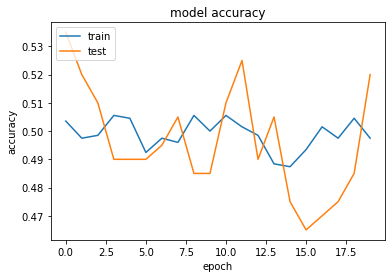

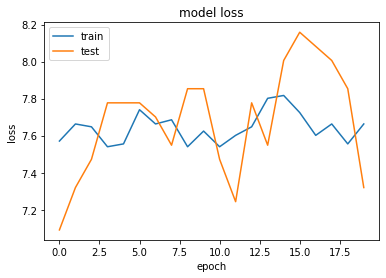

In [31]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[1.]]
Prediction:  with mask


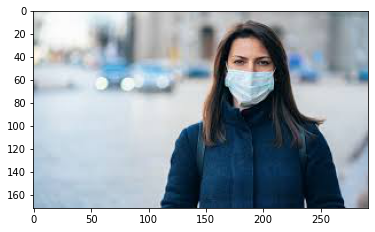

In [35]:
from tensorflow.keras.preprocessing import image
from PIL import Image 
from numpy import asarray 
img_pred = image.load_img("mask1.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="with mask"
else:
    prediction ="without mask"
print('Prediction: ',prediction)

img=mpimg.imread('mask1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [38]:
import json
from keras.models import model_from_json
from keras.models import load_model

model_json = model.to_json()
with open("maskmodel1.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('mask_wts1.h5')
print(" Saved model to disk")

 Saved model to disk


USING OPENCV

In [26]:
import cv2

In [27]:
#cap = cv2.VideoCapture(0)
haarcascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [28]:
from keras.models import model_from_json
from keras.models import load_model
json_file = open('maskmodel1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("mask_wts1.h5")
print("Loaded model from disk")

Loaded model from disk


In [29]:
def facedetect(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face=haarcascade.detectMultiScale(gray,1.1,4)
    faceboxes=[]
    for (x,y,w,h) in face:
        #faceboxes.append([x,y,x+w,y+h])
        face_img=img[x:x+w,y:y+h]
        face_img=cv2.resize(face_img,(150,150))
        face_img=face_img/255.0
        face_img=np.reshape(face_img,(1,150,150,3))
        result=loaded_model.predict(face_img)
        results={0:'without mask',1:'mask'}
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
        cv2.putText(img, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        cv2.imshow('img',img)
    return img,faceboxes

In [20]:
#img = 'mask1.jpg'

In [37]:
cap=cv2.VideoCapture(0)
while True:
    hasFrame,frame=cap.read()
    if not hasFrame:
        cv2.waitKey()
        break
    resultingImg,faceboxes=facedetect(frame)
    if not faceboxes:
        print('No faces found....')
    if cv2.waitKey(1)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
No faces found....
